<div class="alert alert-block alert-success">
<h2>Nama : Salwa Ayu Rafika</h2>
<h2>NIM    : 09011181924012</h2>  
<h2>Project Akhir UAS Mata Kuliah Teknik Biomedik</h2>  
</div>

<div class="alert alert-block alert-danger">
<h2>Klasifikasi Kanker Paru-Paru Menggunakan Convolutional Neural Network dengan Arsitektur Xception</h2>
</div>

## Import Library


Langkah pertama yang dilakukan ialah mengimport library-library yang diperlukan. Library pada Python merupakan sebutan untuk kode program tambahan yang digunakan dalam kebutuhan tertentu.  Dalam hal ini secara umum library yang dipakai terdiri dari library numpy, matplotlib, sklearn dan tensorflow keras. 

In [42]:
import os
import numpy as np
import warnings
import cv2
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

## Load Dataset

Langkah kedua, yaitu load data (memuat data). Pada proses ini memuat contoh sample data dari dataset. Adapun dataset yang digunakan pada project ini ialah dataset dari Kaggle pada link https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images. Dataset tersebut terbagi menjadi Data Training, Data Validation dan Data Testing yang terdiri menjadi 4 kelas yaitu kelas Adenocarcinoma, Large Cell Carcinoma , Normal dan Squamous Cell Carcinoma.

#### a. Load Dataset Train

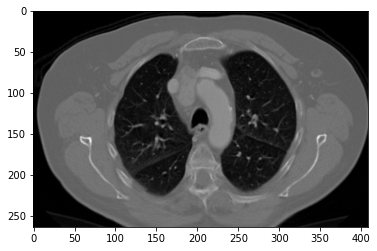

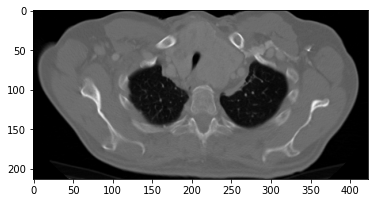

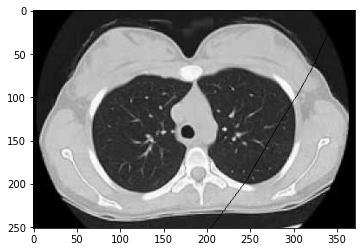

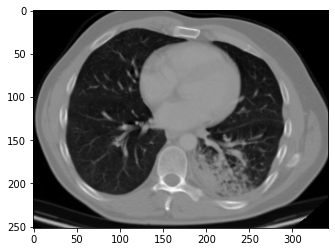

In [4]:
DIR = "C:/Users/lenovo/OneDrive/Documents/Data/train"
CATEGORIES = ["adenocarcinoma","large.cell.carcinoma","normal","squamous.cell.carcinoma"]

for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

#### b. Load Dataset Valid

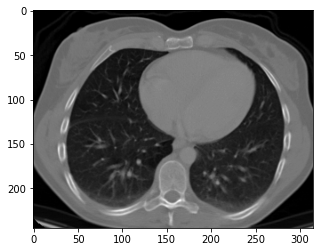

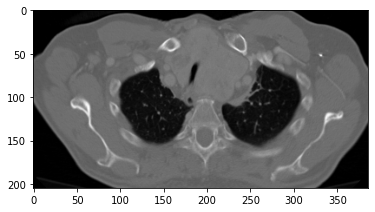

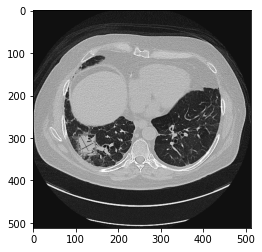

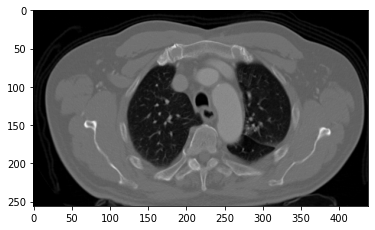

In [7]:
DIR3 = "C:/Users/lenovo/OneDrive/Documents/Data/valid"
CATEGORIES3 = ["adenocarcinoma","large.cell.carcinoma","normal","squamous.cell.carcinoma"]

for category in CATEGORIES3:
    path = os.path.join(DIR3, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

#### c. Load Dataset Test

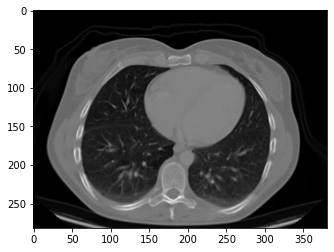

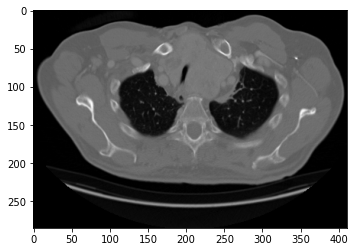

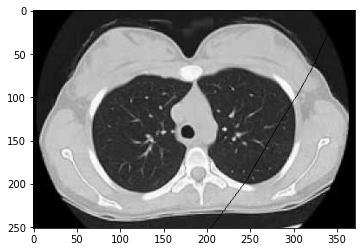

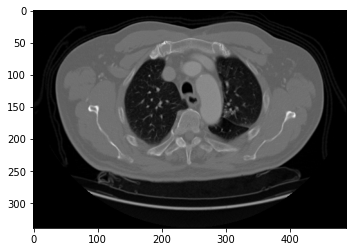

In [6]:
DIR2 = "C:/Users/lenovo/OneDrive/Documents/Data/test"
CATEGORIES2 = ["adenocarcinoma","large.cell.carcinoma","normal","squamous.cell.carcinoma"]

for category in CATEGORIES2:
    path = os.path.join(DIR2, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

## Data Exploration

Pada tahap ini merupakan proses untuk mengeksplorasi dataset meliputi menghitung jumlah data dan membuat visualisasi berupa bar plot untuk mengetahui distribusi data.

### 1. Lihat Jumlah Data

In [8]:
train_path = "C:/Users/lenovo/OneDrive/Documents/Data/train"
valid_path = "C:/Users/lenovo/OneDrive/Documents/Data/valid"
test_path = "C:/Users/lenovo/OneDrive/Documents/Data/test"

In [9]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
valid_set = GetDatasetSize(valid_path)
test_set = GetDatasetSize(test_path)

print(train_set,"\n\n",valid_set,"\n\n",test_set)

{'adenocarcinoma': 195, 'large.cell.carcinoma': 115, 'normal': 148, 'squamous.cell.carcinoma': 155} 

 {'adenocarcinoma': 23, 'large.cell.carcinoma': 21, 'normal': 13, 'squamous.cell.carcinoma': 15} 

 {'adenocarcinoma': 120, 'large.cell.carcinoma': 51, 'normal': 54, 'squamous.cell.carcinoma': 90}


**Dataset Training**
* Jumlah data pada kelas
  adenocarcinoma : 195, 
  large.cell.carcinoma : 115,
  normal = 148,
  squamous.cell.carcinoma: 155
  
**Dataset Validation**
* Jumlah data pada kelas
  adenocarcinoma : 23, 
  large.cell.carcinoma : 21,
  normal = 13,
  squamous.cell.carcinoma: 15

**Dataset Testing**
* Jumlah data pada kelas
  adenocarcinoma : 120, 
  large.cell.carcinoma : 51,
  normal = 54,
  squamous.cell.carcinoma: 90

### 2. Lihat Jumla Distribusi Data dengan Bar Plot

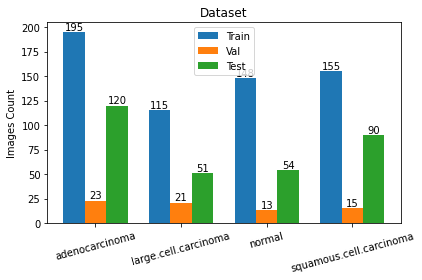

In [11]:
labels = ["adenocarcinoma","large.cell.carcinoma","normal","squamous.cell.carcinoma"]
train_list = list(train_set.values())
val_list = list(valid_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

### Preprocessing

### 1. Cek Dataset

Pada tahap ini merupakan tahap pengecekan file image dari dataset. Jika pada file gambar terdapat kerusakan seperti gambar yang terpotong, format yang salah dan kesalahan yang lainnya. Nanti akan terbaca pada koding di bawah ini dan dapat dihapus secara manual

In [1]:
import os
from PIL import Image
folder_path = 'C:/Users/lenovo/OneDrive/Documents/Data/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
    

In [2]:
import os
from PIL import Image
folder_path = 'C:/Users/lenovo/OneDrive/Documents/Data/valid'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
    

In [3]:
import os
from PIL import Image
folder_path = 'C:/Users/lenovo/OneDrive/Documents/Data/test'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
    

### 2. Data Augmentation

Augmentasi Gambar adalah cara menerapkan berbagai jenis teknik transformasi pada gambar. agar dapat menghasilkan lebih banyak variasi gambar. Pada bagian ini, dataset akan lebih lanjut di proses dengan menggunakan library keras imagedatagenerator. Operasi yang dilakukan seperti rotasi, target_size, translasi, geser, color_mode, rescale, batch_size, zoom range dan lainnya.

In [51]:
# Set some important constants here
IMAGE_SIZE = 224
N_CLASSES = 4
BATCH_SIZE = 5

In [52]:
datagen = ImageDataGenerator(dtype='float32', preprocessing_function=preprocess_input, validation_split = 0.2) 

train_data= datagen.flow_from_directory(train_path,
                                        batch_size = BATCH_SIZE,
                                        target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                        class_mode = 'categorical',
                                        seed = 123)


valid_data = datagen.flow_from_directory(valid_path,
                                        batch_size = BATCH_SIZE,
                                        target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                        class_mode = 'categorical',
                                        seed = 123)

test_data = datagen.flow_from_directory(test_path,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        class_mode='categorical',
                                        shuffle=False)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [53]:
#view the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'adenocarcinoma': 0, 'large.cell.carcinoma': 1, 'normal': 2, 'squamous.cell.carcinoma': 3}
{'adenocarcinoma': 0, 'large.cell.carcinoma': 1, 'normal': 2, 'squamous.cell.carcinoma': 3}


## Visualisasi Data 

Menampilkan Review dari data setelah proses augmentasi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


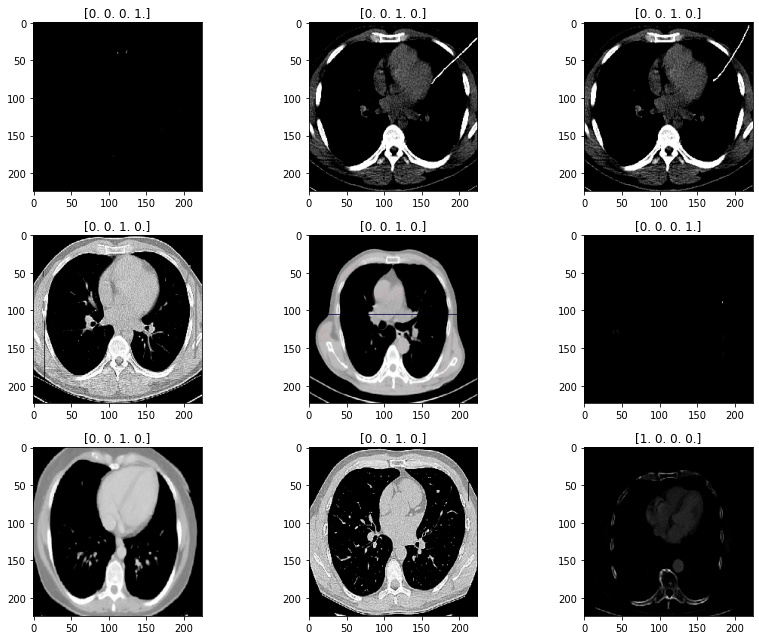

In [54]:
fit, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,9))

for i, a in enumerate(ax.flat):
    img, label = train_data.next()
    a.imshow(img[0],)
    a.set_title(label[0])

plt.tight_layout()
plt.show()

## Model Build

In [61]:
#build the model
xcep_model = Xception(weights='imagenet', 
                    include_top=False, 
                    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

model = xcep_model.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation='softmax')(model)
model = Model(inputs=xcep_model.input, 
              outputs=model)

#get summary()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [62]:
#compile model
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#define checkpoint = untuk menyimpan model atau bobot  pada beberapa interval tertentu sampai menemukan best performance
checkpoint = ModelCheckpoint('modelXception_4Class.h5', 
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='auto',
                             verbose=1)


#reduce learning rate, fungsi lr mengurangi otomatis kalau terjadi matriks yg tidak improve
#patience=3
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.70, 
                              patience = 5, 
                              min_delta = 0.0001,
                              mode='auto',
                              verbose=1)

### Train Model

In [63]:
%%time

#train the model
history = model.fit(train_data,
                    epochs = 15,
                    validation_data=valid_data,
                    verbose=1,
                    callbacks=[checkpoint, reduce_lr])

Epoch 1/15
123/123 [==============================] - ETA: 0s - loss: 1.3385 - accuracy: 0.3426
Epoch 00001: val_accuracy improved from -inf to 0.44444, saving model to modelXception_4Class.h5
123/123 [==============================] - 558s 4s/step - loss: 1.3385 - accuracy: 0.3426 - val_loss: 1.4197 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 2/15
123/123 [==============================] - ETA: 0s - loss: 1.1072 - accuracy: 0.5237
Epoch 00002: val_accuracy improved from 0.44444 to 0.48611, saving model to modelXception_4Class.h5
123/123 [==============================] - 541s 4s/step - loss: 1.1072 - accuracy: 0.5237 - val_loss: 1.0939 - val_accuracy: 0.4861 - lr: 0.0010
Epoch 3/15
123/123 [==============================] - ETA: 0s - loss: 0.9273 - accuracy: 0.5775
Epoch 00003: val_accuracy did not improve from 0.48611
123/123 [==============================] - 568s 5s/step - loss: 0.9273 - accuracy: 0.5775 - val_loss: 0.9285 - val_accuracy: 0.4861 - lr: 0.0010
Epoch 4/15
123/123 [=====

## Evaluasi Model Training

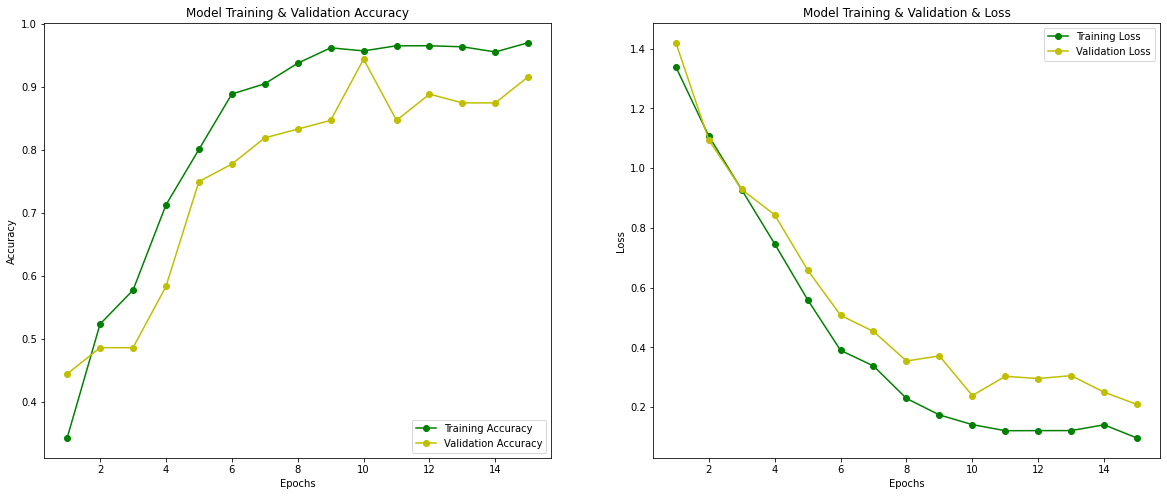

In [64]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

### Hasil akurasi model saat training pada data training

In [65]:
print('Train accuracy & loss:', model.evaluate(train_data))

123/123 [==============================] - 79s 641ms/step - loss: 0.0236 - accuracy: 0.9918
Train accuracy & loss: [0.023646337911486626, 0.9918434023857117]


### Hasil akurasi model pada data test

In [66]:
print('Test accuracy & loss:', model.evaluate(test_data))

10/10 [==============================] - 31s 3s/step - loss: 0.4366 - accuracy: 0.8381
Test accuracy & loss: [0.4366263151168823, 0.8380952477455139]


In [74]:
#define labels for testing
y_test = test_data.classes

#make prediction
y_pred = np.argmax(model.predict(test_data), axis=1)

### Evaluasi Kinerja Model Pada Data Uji (Data Test)

In [75]:
# Parameter evaluasi yang digunakan ialah akurasi, recall, f1 score dan precision
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       120
           1       0.61      0.96      0.75        51
           2       1.00      0.93      0.96        54
           3       0.94      0.73      0.83        90

    accuracy                           0.84       315
   macro avg       0.85      0.86      0.84       315
weighted avg       0.87      0.84      0.84       315



In [72]:
classes = os.listdir('C:/Users/lenovo/OneDrive/Documents/Data/test')
classes

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

[[99 18  0  3]
 [ 2 49  0  0]
 [ 2  1 50  1]
 [12 12  0 66]]


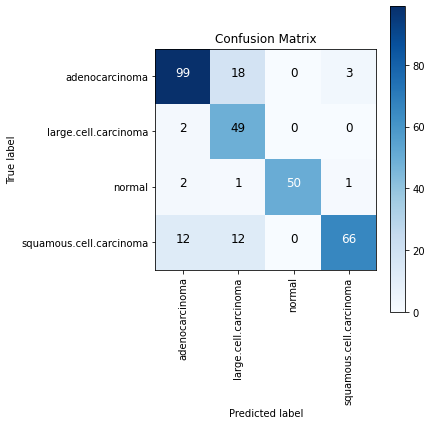

In [76]:
# Confussion Matriks digunakan untuk melihat jumlah prediksi benar (TP&TN) dan prediksi salah (FP&FN) pada masing-masing kelas dari model

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 fontsize = 12,
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

cm = confusion_matrix(y_test, y_pred)
print(cm)

#plot
plot_confusion_matrix(cm, classes, normalize=False)